## Prac W4 - Basic Parametric Models and Statistical Learning

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Q1

#### (a)

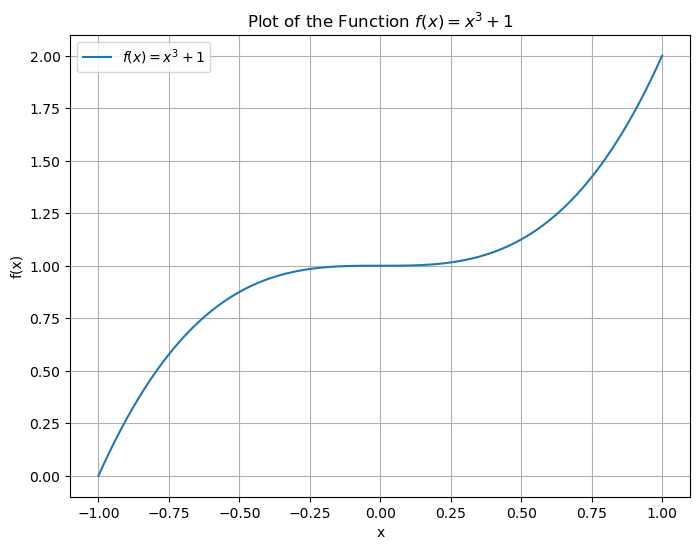

In [9]:
# Define the function
def f(x):
    return x**3 + 1

# Generate x values in the specified domain
x_values = np.linspace(-1, 1, 100)

# Calculate corresponding y values using the function
y_values = f(x_values)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label=r'$f(x) = x^3 + 1$')
plt.title('Plot of the Function $f(x) = x^3 + 1$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

#### (b)

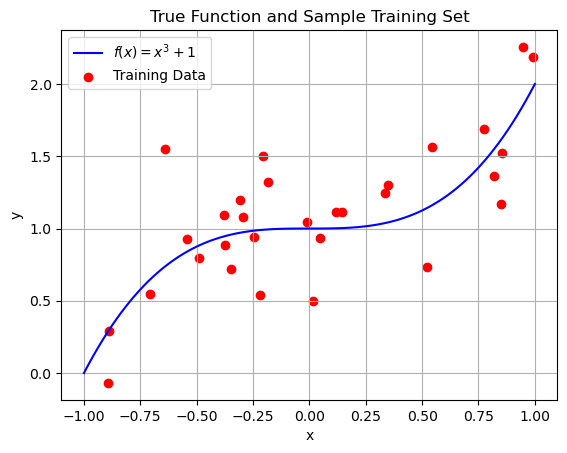

In [12]:
# Set random seed for reproducibility
np.random.seed(50)

# Generate 30 random x values in the specified domain
sample_training_x = np.random.uniform(-1, 1, 30)

# Calculate corresponding y values using the true function and add Gaussian noise
# We'll use standard deviation of 0.3 for the noise
noise = np.random.normal(0, 0.3, 30)
sample_training_y = f(sample_training_x) + noise

# Plot the true function
plt.plot(x_values, y_values, label=r'$f(x) = x^3 + 1$', color='blue')

# Plot the noisy data points
plt.scatter(sample_training_x, sample_training_y, color='red', label='Training Data')

# Add labels and legend
plt.title('True Function and Sample Training Set')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

#### (c)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Reshape the data for sklearn 
# X needs to be 2D array, y is 1D array
X_train = sample_training_x.reshape(-1, 1)
y_train = sample_training_y

# Perform linear regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict y values using the linear model
y_pred = linear_model.predict(X_train)

# Calculate the sum of squares error
mse = mean_squared_error(y_train, y_pred)
print(f'Training Set Sum of Squares Error: {mse:.4f}')

Training Set Sum of Squares Error: 0.1242


#### (d)

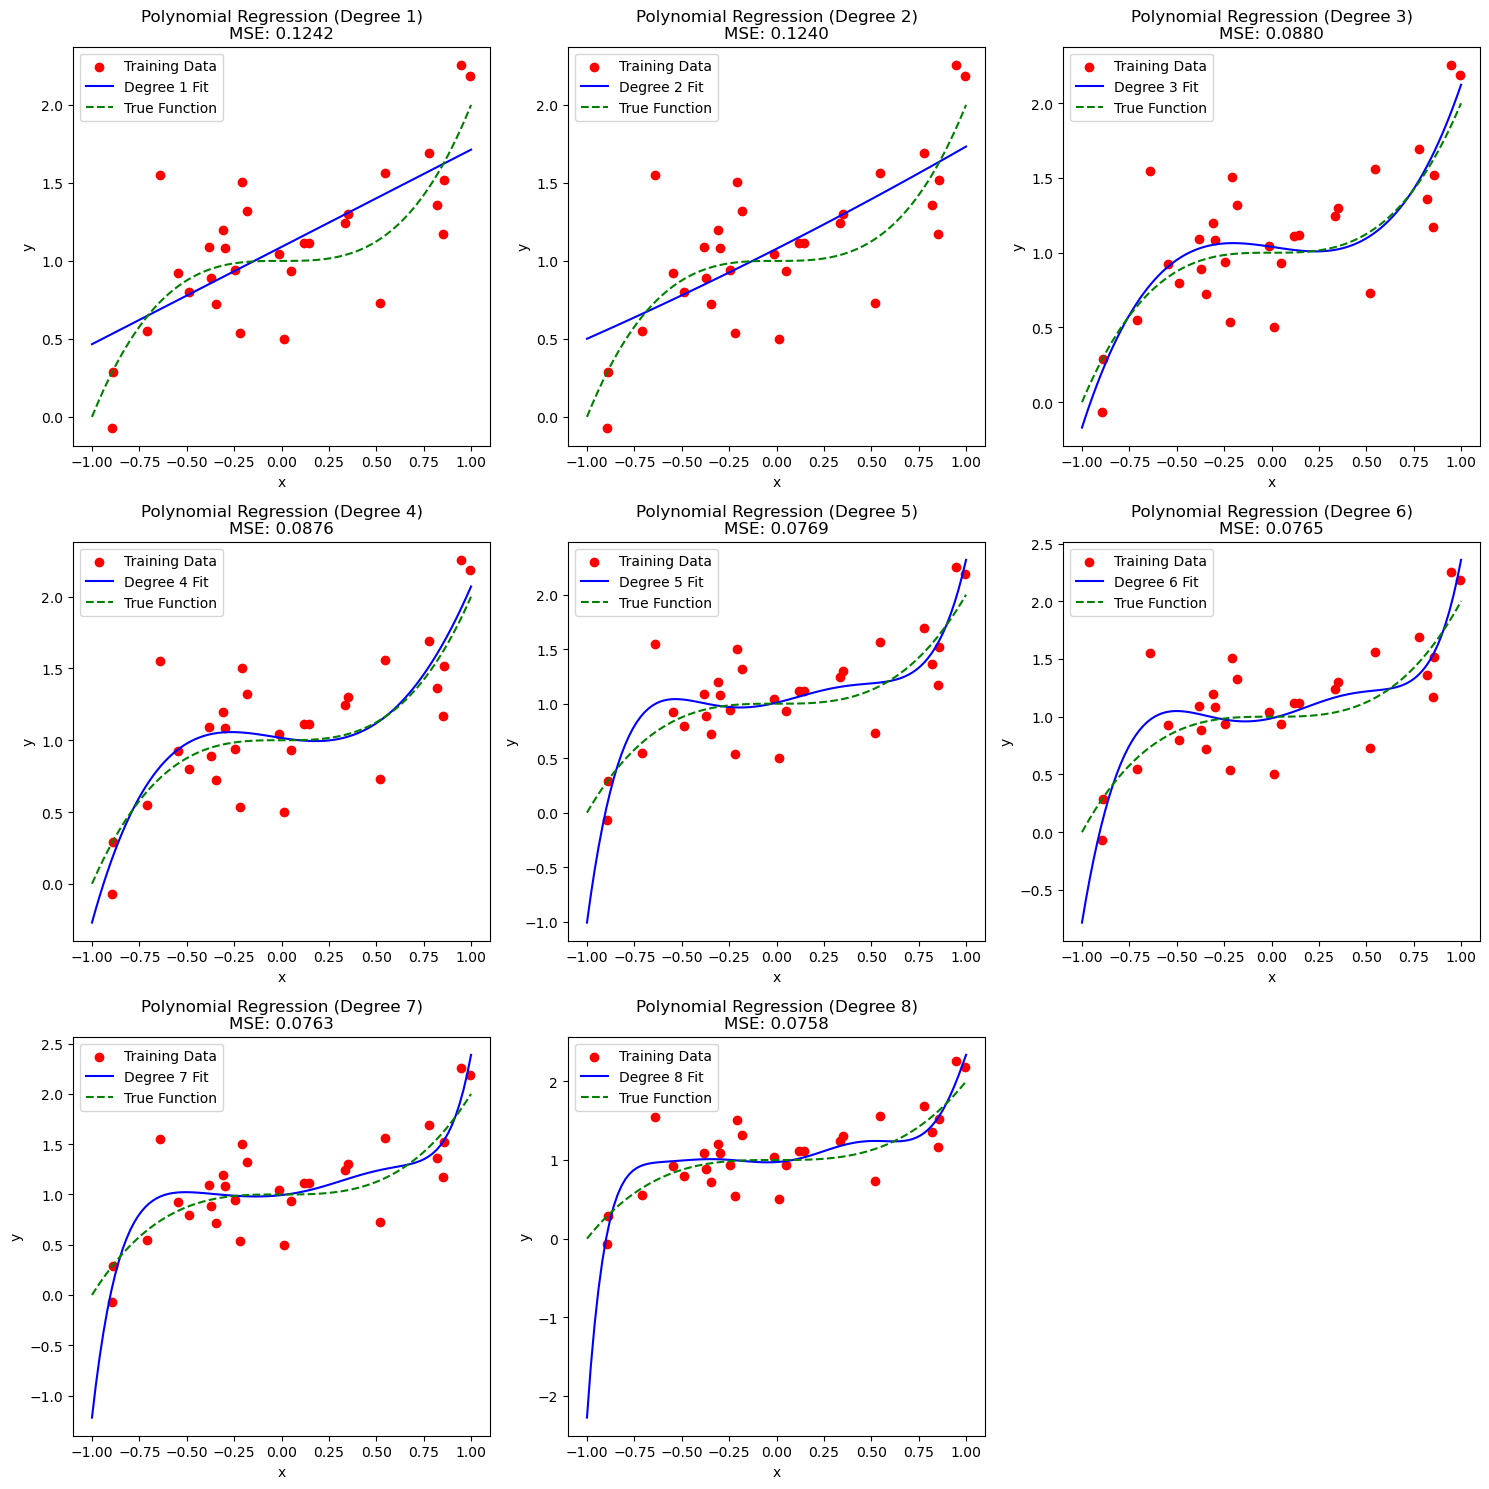

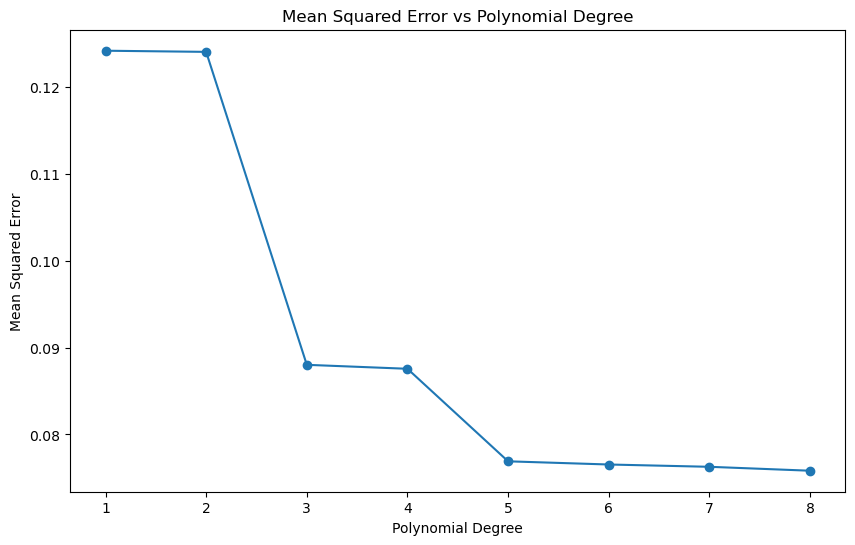

In [20]:
from sklearn.preprocessing import PolynomialFeatures

# Prepare the data
X_train = sample_training_x.reshape(-1, 1)
y_train = sample_training_y

# Store MSE for each degree
mses = []

# Create a larger figure for subplots
plt.figure(figsize=(15, 15))

# Experiment with different polynomial orders
for degree in range(1, 9):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X_train)
    
    # Perform polynomial regression
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y_train)
    
    # Predict y values using the polynomial model
    y_pred = poly_model.predict(X_poly)
    
    # Calculate the sum of squares error
    mse = mean_squared_error(y_train, y_pred)
    mses.append(mse)
    
    # Create sorted x values for smooth plotting
    X_plot = np.linspace(-1, 1, 100).reshape(-1, 1)
    X_plot_poly = poly_features.transform(X_plot)
    y_plot_pred = poly_model.predict(X_plot_poly)
    
    # Plot the results in subplot
    plt.subplot(3, 3, degree)
    plt.scatter(sample_training_x, sample_training_y, color='red', label='Training Data')
    plt.plot(X_plot, y_plot_pred, color='blue', label=f'Degree {degree} Fit')
    plt.plot(x_values, y_values, color='green', linestyle='--', label='True Function')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Polynomial Regression (Degree {degree})\nMSE: {mse:.4f}')
    plt.legend()

plt.tight_layout()
plt.show()

# Plot MSE vs Polynomial Degree
plt.figure(figsize=(10, 6))
plt.plot(range(1, 9), mses, marker='o')
plt.title('Mean Squared Error vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.show()

### Q2

#### (b)

In [61]:
from sklearn.impute import SimpleImputer
# Load the dataset
data = pd.read_csv('pokemonregr.csv')

# Handle missing data (if any)
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Define X (features) and y (target)
X = data_imputed.iloc[:, :-1]  # All columns except last one
y = data_imputed.iloc[:, -1]   # Last column (weight_kg)

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

#### (c)

In [69]:
# Coefficients of the regression model
coefficients = model.coef_
print("Coefficients:", dict(zip(X.columns, coefficients)))

Coefficients: {'attack': 0.35707377616482683, 'defense': 0.5515635727054373, 'height_m': 53.84388040883519, 'sp_attack': 0.015288314007572157, 'sp_defense': 0.1585417519565229, 'speed': -0.394064113554763}


#### (d)

In [72]:
from sklearn.preprocessing import MinMaxScaler

# Identify the most important feature
most_important_feature = X.columns[np.argmax(np.abs(coefficients))]
print("Most important feature:", most_important_feature)

# Normalize input features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_normalized = scaler_X.fit_transform(X)
y_normalized = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Fit linear regression model with normalized features
model_norm = LinearRegression()
model_norm.fit(X_normalized, y_normalized)

# Coefficients after normalization
coefficients_norm = model_norm.coef_
print("Coefficients after normalization:", dict(zip(X.columns, coefficients_norm)))

Most important feature: height_m
Coefficients after normalization: {'attack': 0.06428613693705683, 'defense': 0.12412662918456008, 'height_m': 0.7755069792830829, 'sp_attack': 0.002813612499890876, 'sp_defense': 0.033300427996469484, 'speed': -0.0689750148750575}


### Q3

### (a)

In [78]:
from sklearn.linear_model import LogisticRegression

# Load dataset
w3classif = pd.read_csv('w3classif.csv', header=None)

# Define X (features) and y (target)
X = w3classif.iloc[:, :-1].values  # First two columns
y = w3classif.iloc[:, -1].values   # Last column (class label)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create and fit the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_scaled, y)

# Display the model parameters
print("Model Coefficients:", logreg_model.coef_)
print("Model Intercept:", logreg_model.intercept_)

Model Coefficients: [[2.90589536 3.01711333]]
Model Intercept: [0.60005739]


### (b)

In [81]:
# Standardize the test data point x' = (1.1, 1.1)
x_test = np.array([[1.1, 1.1]])
x_test_scaled = scaler.transform(x_test)

# Predict the probability p(y' = 1 | x')
probability_y1 = logreg_model.predict_proba(x_test_scaled)[:, 1]
print("Probability p(y' = 1 | x'):", probability_y1[0])

Probability p(y' = 1 | x'): 0.32755948200242047


### (c)

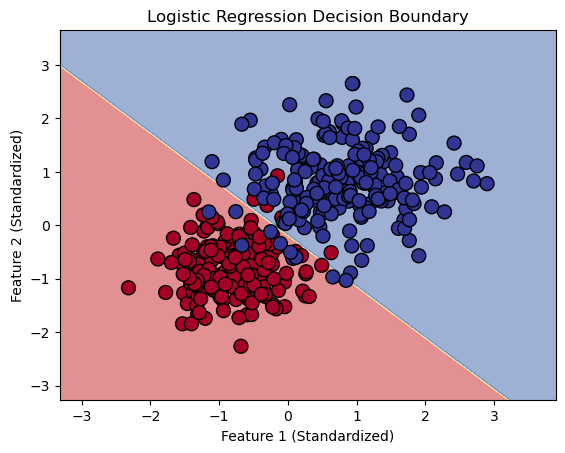

In [84]:
# Generate a meshgrid of points for plotting the decision boundary
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Standardize the meshgrid points
meshgrid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict the class labels for the meshgrid points
predictions = logreg_model.predict(meshgrid_points)

# Reshape the predictions to match the shape of the meshgrid
predictions = predictions.reshape(xx.shape)

# Plot the decision boundary and data points
plt.contourf(xx, yy, predictions, cmap='RdYlBu', alpha=0.5)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='RdYlBu', edgecolors='k', marker='o', s=100)

# Plot labels and title
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.title('Logistic Regression Decision Boundary')

# Show the plot
plt.show()